In [0]:
# import the necessary packages
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [0]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=81a3fb6bdd0ae1675944ea6b26d68a6f824e1c1d664e0c66064c65339574ab08
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [0]:
os.chdir('drive/My Drive/dataset2')

In [0]:
# grab the paths to the input images in our dataset
print("[INFO] quantifying faces...")
imagePaths = list(paths.list_images('data'))
# initialize the list of known encodings and known names
knownEncodings = []
knownNames = []

[INFO] quantifying faces...


In [0]:
args = []
args["detection_method"] = "cnn"

TypeError: ignored

In [0]:
# loop over the image paths
for (i, imagePath) in enumerate(imagePaths):
	# extract the person name from the image path
	print("[INFO] processing image {}/{}".format(i + 1,
		len(imagePaths)))
	name = imagePath.split(os.path.sep)[-2]
	# load the input image and convert it from BGR (OpenCV ordering)
	# to dlib ordering (RGB)
	image = cv2.imread(imagePath)
	rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 	# detect the (x, y)-coordinates of the bounding boxes
	# corresponding to each face in the input image
	boxes = face_recognition.face_locations(rgb,
		model="cnn")
	# compute the facial embedding for the face
	encodings = face_recognition.face_encodings(rgb, boxes)
	# loop over the encodings
	for encoding in encodings:
		# add each encoding + name to our set of known names and
		# encodings
		knownEncodings.append(encoding)
		knownNames.append(name)

[INFO] processing image 1/27
[INFO] processing image 2/27
[INFO] processing image 3/27
[INFO] processing image 4/27
[INFO] processing image 5/27
[INFO] processing image 6/27
[INFO] processing image 7/27
[INFO] processing image 8/27
[INFO] processing image 9/27
[INFO] processing image 10/27
[INFO] processing image 11/27
[INFO] processing image 12/27
[INFO] processing image 13/27
[INFO] processing image 14/27
[INFO] processing image 15/27
[INFO] processing image 16/27
[INFO] processing image 17/27
[INFO] processing image 18/27
[INFO] processing image 19/27
[INFO] processing image 20/27
[INFO] processing image 21/27
[INFO] processing image 22/27
[INFO] processing image 23/27
[INFO] processing image 24/27
[INFO] processing image 25/27
[INFO] processing image 26/27
[INFO] processing image 27/27


In [0]:
# dump the facial encodings + names to disk
print("[INFO] serializing encodings...")
data = {"encodings": knownEncodings, "names": knownNames}
f = open("encodings1.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing encodings...


In [0]:
ls

 data/                      encodings.pickle
 dataq/                     photo1.jpg
'deploy (1).prototxt.txt'   photo2.jpg
 deploy.prototxt.txt        photo3.jpg
 encodings1.pickle          res10_300x300_ssd_iter_140000.caffemodel


## **Training Completed Now Testing**

 ---



In [0]:
os.chdir('drive/My Drive/dataset2') # This is where my dataset is placed

In [0]:
ls

 data/                      encodings.pickle
 dataq/                     photo1.jpg
'deploy (1).prototxt.txt'   photo2.jpg
 deploy.prototxt.txt        photo3.jpg
 encodings1.pickle          res10_300x300_ssd_iter_140000.caffemodel


In [0]:
# import the necessary packages
import face_recognition
import argparse
import pickle
import cv2

In [0]:
encodings = "encodings1.pickle"
images = "photo2.jpg"
detection_method = "cnn"


In [228]:
# load the known faces and embeddings
print("[INFO] loading encodings...")
data = pickle.loads(open(encodings, "rb").read())
# load the input image and convert it from BGR to RGB
image = cv2.imread(images)
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# detect the (x, y)-coordinates of the bounding boxes corresponding
# to each face in the input image, then compute the facial embeddings
# for each face
print("[INFO] recognizing faces...")
boxes = face_recognition.face_locations(rgb,
	model=detection_method)
encodings = face_recognition.face_encodings(rgb, boxes)
# initialize the list of names for each face detected
names = []

[INFO] loading encodings...
[INFO] recognizing faces...


In [0]:
class Actor:   
    # __init__ function 
    def __init__(self,name,age,gender,born): 
        self.name = name
        self.age = "("+str(age)+")"
        self.gender =gender
        self.born =born 

In [0]:
downey = Actor("Downey",55,"MALE","New York")
chris = Actor("Chris",36,"MALE","Melbourne")
jeremy = Actor("Jeremy",49,"MALE","California")
scarlett = Actor("Scarlett",35,"FEMALE","New York")

In [231]:
eval("downey").name

'Downey'

In [0]:
# loop over the facial embeddings
for encoding in encodings:
	# attempt to match each face in the input image to our known
	# encodings
	matches = face_recognition.compare_faces(data["encodings"],
		encoding)
	name = "Unknown"
  	# check to see if we have found a match
	if True in matches:
		# find the indexes of all matched faces then initialize a
		# dictionary to count the total number of times each face
		# was matched
		matchedIdxs = [i for (i, b) in enumerate(matches) if b]
		counts = {}
		# loop over the matched indexes and maintain a count for
		# each recognized face face
		for i in matchedIdxs:
			name = data["names"][i]
			counts[name] = counts.get(name, 0) + 1
		# determine the recognized face with the largest number of
		# votes (note: in the event of an unlikely tie Python will
		# select first entry in the dictionary)
		name = max(counts, key=counts.get)
	
	# update the list of names
	names.append(name)

In [0]:
# loop over the recognized faces
for ((top, right, bottom, left), name) in zip(boxes, names):
	# draw the predicted face name on the image
  if(name != "Unknown"):
    name = eval(name)
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name.name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,0.75, (0, 191, 0), 2)
    cv2.putText(image, name.age, (left+90, y), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 0, 255), 2)
    # cv2.putText(image, name.gender, (left+90, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 191, 0), 2)
    # cv2.putText(image, name.born, (left+80, y), cv2.FONT_HERSHEY_SIMPLEX,0.5, (0, 191, 0), 2)

Populating the interactive namespace from numpy and matplotlib


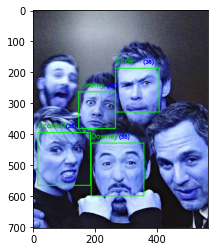

In [234]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# img=mpimg.imread('your_image.png')
imgplot = plt.imshow(image)
plt.show()

In [0]:
from google.colab.patches import cv2_imshow

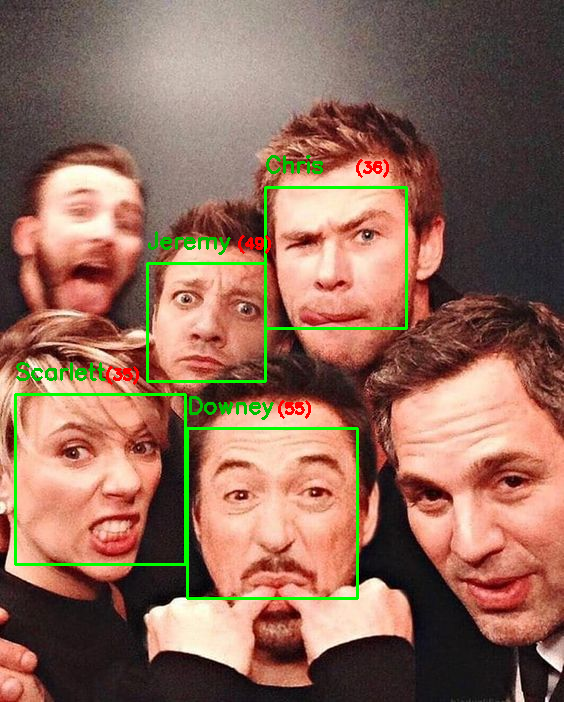

In [236]:
cv2_imshow(image)

##Database Can be seen below

In [0]:
os.chdir('data')

In [238]:
ls

chris/  downey/  jeremy/  scarlett/


In [0]:
#Four Directory with People Names